<a href="https://colab.research.google.com/github/Tam1979/TATA-ML/blob/master/w3_2b_mnist_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Model for MNIST dataset

We are going to do a linear model for the MNIST Dataset.

In [0]:
# Install the package for running tensorboard on google colaboration
!pip install -U tensorboardcolab

Requirement already up-to-date: tensorboardcolab in /usr/local/lib/python3.6/dist-packages (0.0.22)


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [0]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB == True:
  from tensorboardcolab import *
  tbc=TensorBoardColab()


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://3476e975.ngrok.io


## Step 1: Load the MNIST data

In [0]:
#Load Mnist data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Now let's take a look at one of these downloaded images:

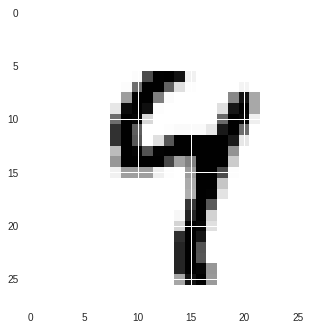

In [0]:
plt.imshow(mnist.train.images[2].reshape([28,28]))

#TODO: Try plotting another image



## Step 2: Define our model and equation.

Our formula is:

$$y = Wx + B$$

Straight from your algebra course.  Of course, in this case our input is a 28 by 28 matrix, which we will flatten in into a vector of 784.  

Each variable is going to be one-hot-encoded, to be a one-hot array of 10. Why 10? 10 possible values in the classification.

So our weight is going to be a 784 x 10 matrix, and the bias will be a vector of size 10.

The placeholder will have a initial param of None so we can feed all the training samples.

In [0]:
#Define Variable placeholders

x = tf.placeholder(tf.float32, [None, 784], name='Input')
W = tf.Variable(tf.zeros([784, 10]), name='Weight')
b = tf.Variable(tf.zeros([10]), name='Bias')
logs_path = '/tmp/tensorflow_logs/example/'

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Set up softmax regression model
y = tf.nn.softmax(tf.matmul(x, W) + b)


## Step 3: Train the Model

We will define our y_ which is the placeholder for our labels.

We will also define our cross-entropy loss which is:

$$H(p,q) = -\sum_{x\in\mathcal{X}} p(x)\, \log q(x)$$


**=> TODO: Set learning Rate to 0.5**

In [0]:
# Train model
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph()) #####


Instructions for updating:
Use tf.cast instead.


**=> TODO: Set the Number of epochs to 1000 **


In [0]:

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  
        

sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB == True:
    summary_writer = tbc.get_writer()# saving data on google colab
    summary_writer.add_graph(sess.graph)
  


## Step 4: Get our Accuracy

The accuracy is the number correct over the total. Let's get that.

In [0]:
# Evaluate Model

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.4179


## Step 5: Look at our Graph

In [0]:
## Step 5: Look at our Graph
# Run this "helper" code to visualize the session graph.

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [0]:
show_graph(sess.graph)
